[ 4.03308375e-01 -8.71003260e-01  7.99489604e+02  2.89119155e-01
  5.52445219e-01 -3.02469153e+00 -1.48932683e-04 -6.21141904e-05]
[ 1.16355459e+00  1.73049415e+00 -9.25015559e+02 -6.08197919e-01
  1.10060268e+00  4.89576884e+02  1.35513586e-04  3.26090183e-04]


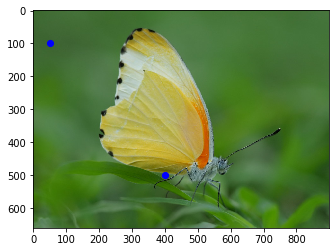

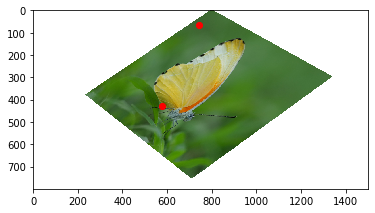

In [8]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def find_coefs(original_coords, warped_coords):
        matrix = []
        for p1, p2 in zip(original_coords, warped_coords):
            matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
            matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

        A = np.matrix(matrix, dtype=np.float)
        B = np.array(warped_coords).reshape(8)

        res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
        return np.array(res).reshape(8)


coefs = find_coefs(
                  [(867,652), (1020,580), (1206,666), (1057,757)],
                  [(700,732), (869,754), (906,916), (712,906)]
                  )

coefs_inv = find_coefs(
                  [(700,732), (869,754), (906,916), (712,906)],
                  [(867,652), (1020,580), (1206,666), (1057,757)]
                  )
print(coefs)
print(coefs_inv)

image = Image.open('sample.png')

img = image.transform(((1500,800)),
                      method=Image.PERSPECTIVE,
                      data=coefs_inv)

a, b, c, d, e, f, g, h = coefs

old_p1 = [50, 100]
x,y = old_p1
new_x = (a * x + b * y + c) / (g * x + h * y + 1)
new_y = (d * x + e * y + f) / (g * x + h * y + 1)
new_p1 = (int(new_x),int(new_y))

old_p2 = [400, 500]
x,y = old_p2
new_x = (a * x + b * y + c) / (g * x + h * y + 1)
new_y = (d * x + e * y + f) / (g * x + h * y + 1)
new_p2 = (int(new_x),int(new_y))



plt.figure()
plt.imshow(image)
plt.scatter([old_p1[0], old_p2[0]],[old_p1[1], old_p2[1]]  , s=150, marker='.', c='b')
plt.show()


plt.figure()
plt.imshow(img)
plt.scatter([new_p1[0], new_p2[0]],[new_p1[1], new_p2[1]]  , s=150, marker='.', c='r')

plt.show()